In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generating and saving the training data and targets

In [47]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))
ns = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs,zs,ns))

noise = np.random.uniform(-1, 1, (observations,1))

generated_outputs = 2*xs -3*zs + 7*ns + 5 + noise

np.savez('TF_intro' , inputs=generated_inputs , targets=generated_outputs)

numpy savez function saves any tensor type into a .npz file.

In [48]:
training_data = np.load('TF_intro.npz')

# Training the model  with TF 

In [121]:
input_size = 3
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                            kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                            bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1) 
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=custom_optimizer,
    loss='huber_loss')

model.fit(
    training_data['inputs'],
    training_data['targets'],
    epochs=100,
    verbose=0)



# How to extract weights and bias 

In [122]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

# Extract the outputs(make prediction)

In [123]:
predicted_outputs = model.predict_on_batch(training_data['inputs']).round(1)

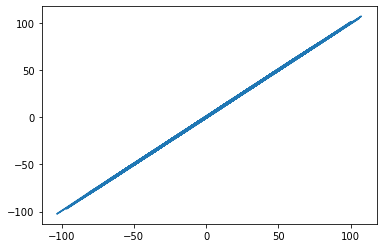

In [124]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])) , np.squeeze(training_data['targets']))


In [125]:
np.sum(abs(model.predict_on_batch(training_data['inputs'])-training_data['targets']))

487.5436665277935